In [1]:
import numpy as np  
import pandas as pd 
from matplotlib import pyplot as plt 

In [2]:
data = pd.read_csv('cricketers.csv', sep="\t") 

In [3]:
print (data.shape) 

(109, 14)


In [4]:
print(data.columns)

Index(['PLAYER', 'matches_played', 'innings_batted', 'runs_scored',
       'highest_runs', 'balls_faced', 'average_runs', 'strike_rate',
       'innings_bowled', 'overs', 'runs_given', 'wickets_obtained',
       'average_runs_per_wicket ', 'bowling_economy '],
      dtype='object')


In [5]:
#Some columns have spaces stripping them
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')
data.columns

Index(['player', 'matches_played', 'innings_batted', 'runs_scored',
       'highest_runs', 'balls_faced', 'average_runs', 'strike_rate',
       'innings_bowled', 'overs', 'runs_given', 'wickets_obtained',
       'average_runs_per_wicket', 'bowling_economy'],
      dtype='object')

In [6]:
data.head(2)

,player,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,Aaron Finch,10,9,134,46,100,16.75,144.00,0,0.0,0,0,0.0,0.0
1,AB de Villiers,12,11,480,90,275,53.33,174.54,0,0.0,0,0,0.0,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 14 columns):
player                     109 non-null object
matches_played             109 non-null int64
innings_batted             109 non-null int64
runs_scored                109 non-null int64
highest_runs               109 non-null int64
balls_faced                109 non-null int64
average_runs               109 non-null float64
strike_rate                109 non-null float64
innings_bowled             109 non-null int64
overs                      109 non-null float64
runs_given                 109 non-null int64
wickets_obtained           109 non-null int64
average_runs_per_wicket    109 non-null float64
bowling_economy            109 non-null float64
dtypes: float64(5), int64(8), object(1)
memory usage: 12.0+ KB


In [8]:
data.describe()

,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.00000,109.000000,109.000000,109.000000
mean,9.559633,7.889908,173.633028,43.495413,124.669725,22.360092,122.258716,4.513761,13.894495,119.93578,3.926606,17.334862,5.149817
std,5.161164,4.982078,182.356522,29.830268,123.670265,16.093453,48.576709,5.449456,18.395495,152.80763,5.602094,21.910816,4.773435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-0.000000,0.000000
25%,5.000000,4.000000,36.000000,20.000000,33.000000,11.800000,109.090000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,10.000000,7.000000,99.000000,40.000000,76.000000,21.160000,130.260000,2.000000,3.000000,27.00000,0.000000,0.000000,7.280000
75%,14.000000,13.000000,260.000000,62.000000,188.000000,30.000000,146.040000,8.000000,26.000000,223.00000,6.000000,28.360000,9.230000
max,17.000000,17.000000,735.000000,128.000000,516.000000,75.830000,300.000000,17.000000,68.000000,533.00000,24.000000,108.000000,16.500000


# 1. Given that K-means depends on distance metric, it is a convention to normalize the data attributes so that attributes are on the same scale. So, in this first task, normalize all data attributes.


In [9]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler().fit(data.iloc[:,1:])
data.iloc[:,1:] = minmax_scale.transform(data.iloc[:,1:])

In [10]:
data.head(2)

,player,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,Aaron Finch,0.588235,0.529412,0.182313,0.359375,0.193798,0.220889,0.4800,0.0,0.0,0.0,0.0,0.0,0.0
1,AB de Villiers,0.705882,0.647059,0.653061,0.703125,0.532946,0.703284,0.5818,0.0,0.0,0.0,0.0,0.0,0.0


# 2. Write your own code for K-means algorithm using two attributes namely average_runs and bowling_economy. Take K=2. Plot clusters on a scatter plot with X and Y being the two attributes namely average_runs and bowling_economy, respectively. Color data points belonging to the first cluster with red and the second cluster with blue. Copy the plot diagram in the word document and interpret the output.

In [11]:
from sklearn.metrics import pairwise_distances
class Kmeans:
    
    def __init__(self, k, max_iter = 200):
        self.k = k
        self.max_iter = max_iter       
    
    def initialise_centroids(self, data):
        self.centroids=data.sample(self.k)
        return self.centroids
    
    
    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.""" 
        
        if data.ndim == 1:
            data = data.reshape(-1, 1)
        
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return  self.cluster_labels
    
    
    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points""" 
        
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids

    
    def predict(self, data):
        
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        
        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self   

In [12]:
df = data[['average_runs','bowling_economy']]
df.head()


,average_runs,bowling_economy
0,0.220889,0.0
1,0.703284,0.0
2,0.830806,0.0
3,0.375313,0.0
4,0.325201,0.0


In [13]:
kmeans_obj=Kmeans(2,600)
kmeans_obj.fit_kmeans(df)
P=kmeans_obj.predict(df)

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


In [14]:
print(kmeans_obj.centroids)

[[0.40266605 0.        ]
 [0.21004923 0.55770492]]


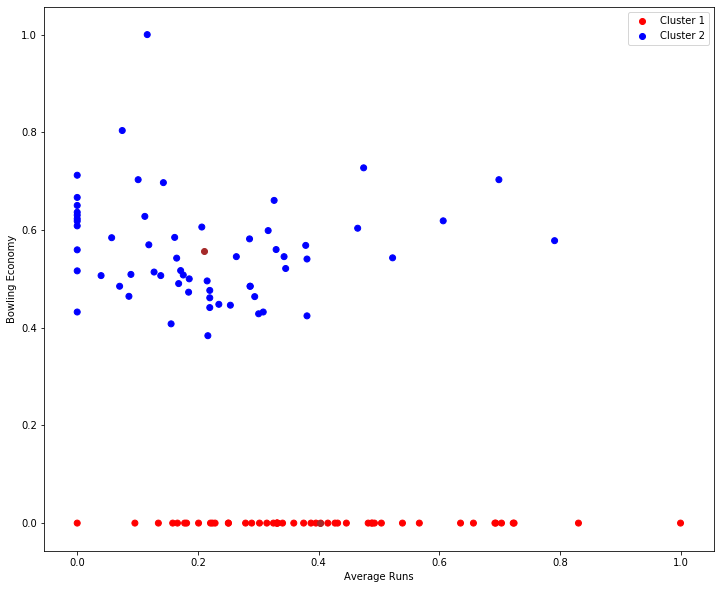

In [15]:
from matplotlib.colors import ListedColormap
classes = ['Cluster 1', 'Cluster 2']
colours = ListedColormap(['red','blue'])
plt.figure(figsize=(12,10))
ax=plt.scatter(df['average_runs'],df['bowling_economy'],c=P,cmap=colours)
plt.scatter(kmeans_obj.centroids[:,0] ,kmeans_obj.centroids[:,1], color='brown')
plt.xlabel("Average Runs")
plt.ylabel("Bowling Economy")
plt.legend(handles=ax.legend_elements()[0], labels=classes)
plt.show()

# 3. Redo question-2 on different values of K = 2,3,4,5. For each case, draw the plot of clusters as stated above. Visualize these plots, copy the plot diagrams in the word document, and comment on which is better clustering (and reasons) based on visualization only.


###### K=2

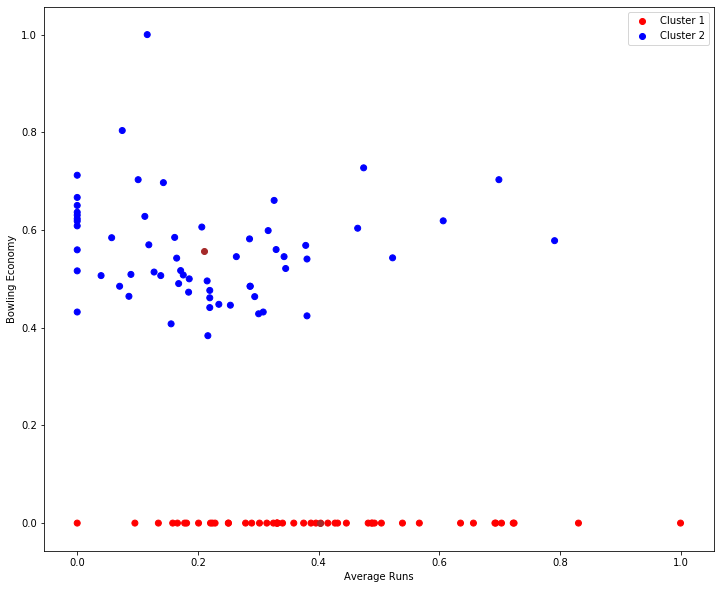

In [16]:
classes = ['Cluster 1', 'Cluster 2']
colours = ListedColormap(['red','blue'])
plt.figure(figsize=(12,10))
ax=plt.scatter(df['average_runs'],df['bowling_economy'],c=P,cmap=colours)
plt.scatter(kmeans_obj.centroids[:,0] ,kmeans_obj.centroids[:,1], color='brown')
plt.xlabel("Average Runs")
plt.ylabel("Bowling Economy")
plt.legend(handles=ax.legend_elements()[0], labels=classes)
plt.show()

###### K=3

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


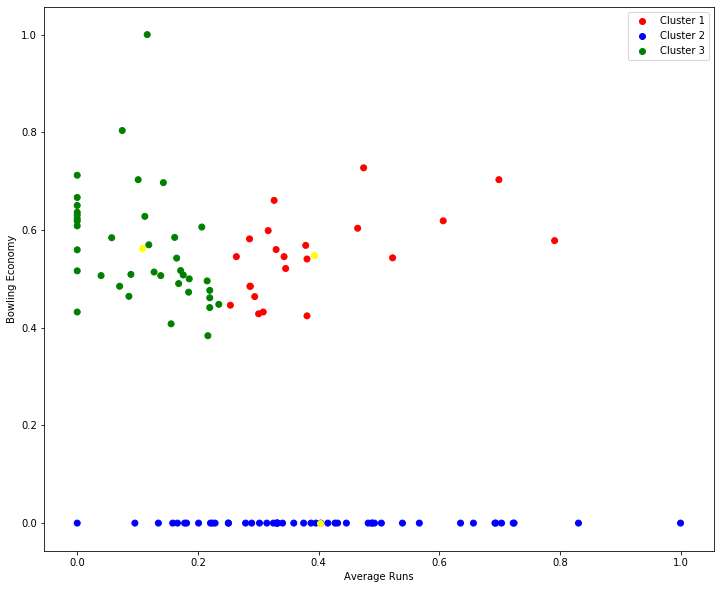

In [17]:
kmeans_obj=Kmeans(3,600)
kmeans_obj.fit_kmeans(df)
P=kmeans_obj.predict(df)

classes = ['Cluster 1', 'Cluster 2','Cluster 3']
colours = ListedColormap(['red','blue','green'])
plt.figure(figsize=(12,10))
ax=plt.scatter(df['average_runs'],df['bowling_economy'],c=P,cmap=colours)
plt.scatter(kmeans_obj.centroids[:,0] ,kmeans_obj.centroids[:,1], color='yellow')
plt.xlabel("Average Runs")
plt.ylabel("Bowling Economy")
plt.legend(handles=ax.legend_elements()[0], labels=classes)
plt.show()

###### K=4

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Running Model Iteration 600 
Running Model Iteration 700 
Running Model Iteration 800 
Running Model Iteration 900 
Model finished running


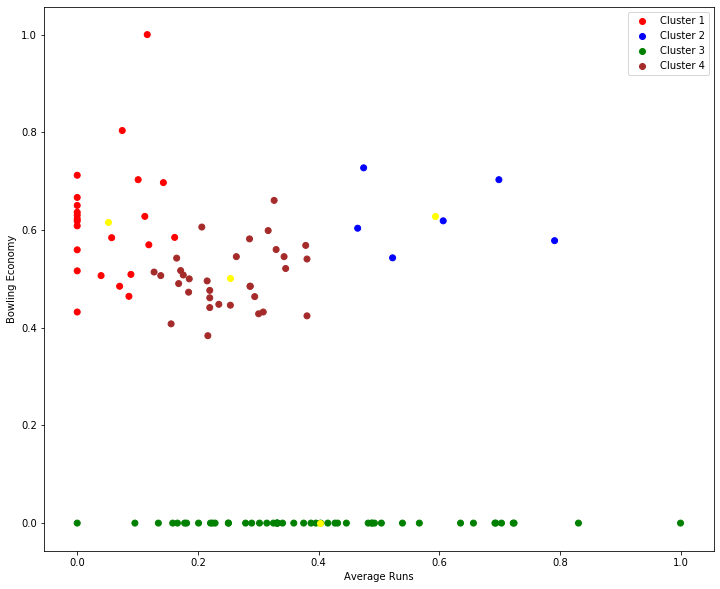

In [18]:
kmeans_obj=Kmeans(4,1000)
kmeans_obj.fit_kmeans(df)
P=kmeans_obj.predict(df)

classes = ['Cluster 1', 'Cluster 2','Cluster 3','Cluster 4']
colours = ListedColormap(['red','blue','green','brown'])
plt.figure(figsize=(12,10))
ax=plt.scatter(df['average_runs'],df['bowling_economy'],c=P,cmap=colours)
plt.scatter(kmeans_obj.centroids[:,0] ,kmeans_obj.centroids[:,1], color='yellow')
plt.xlabel("Average Runs")
plt.ylabel("Bowling Economy")
plt.legend(handles=ax.legend_elements()[0], labels=classes)
plt.show()

###### K=5

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Running Model Iteration 600 
Running Model Iteration 700 
Running Model Iteration 800 
Running Model Iteration 900 
Model finished running


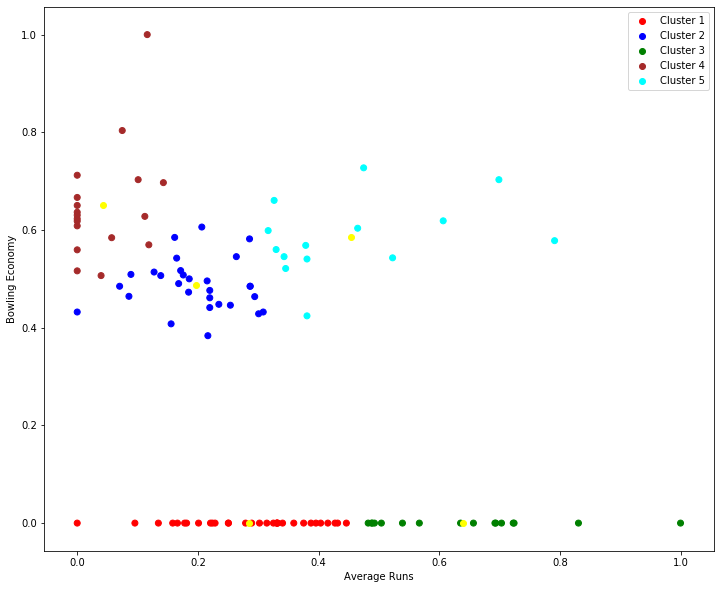

In [19]:
kmeans_obj=Kmeans(5,1000)
kmeans_obj.fit_kmeans(df)
P=kmeans_obj.predict(df)

classes = ['Cluster 1', 'Cluster 2','Cluster 3','Cluster 4','Cluster 5']
colours = ListedColormap(['red','blue','green','brown','cyan'])
plt.figure(figsize=(12,10))
ax=plt.scatter(df['average_runs'],df['bowling_economy'],c=P,cmap=colours)
plt.scatter(kmeans_obj.centroids[:,0] ,kmeans_obj.centroids[:,1], color='yellow')
plt.xlabel("Average Runs")
plt.ylabel("Bowling Economy")
plt.legend(handles=ax.legend_elements()[0], labels=classes)
plt.show()

# COMPLETED